# Evaluations 101

This lesson (and the subsequent eight additional lessons) focus on approaches for writing LLM use-case evaluations, a critical component of developing AI-powered applications.  

In the rapidly evolving landscape of artificial intelligence, large language models have become powerful tools for businesses across various industries. However, harnessing the full potential of these models requires more than just implementation—it demands careful evaluation and optimization. This is where prompt evaluations, or "evals," come into play.

These are two real quotes from our internal Solutions Architect team explaining why evaluations are so important:

>The (in)ability for teams to measure the performance of their models is the biggest blocker of production use cases for LLMs and also makes prompting an art instead of a science

>even though evals take a lot of time, doing them up front will save developer time in the long run and result in better products getting out much sooner

There are two main reasons developers are not writing evaluations:
1. Many people are unfamiliar with the entire idea of evaluations
2. It's unclear how to actually implement evaluations

This course aims to explain both pieces: what evaluations are and how to write them.

This introductory lesson tackles the first piece, giving an introduction to the concept of evaluations and a high-level overview of the various approaches to writing evaluations.

---


---
### 中文翻译：
＃评估101

本课程（以及随后的八个课程）专注于编写LLM用例评估的方法，这是开发AI驱动应用程序的关键组成部分。

在人工智能快速发展的景观中，大型语言模型已成为各个行业企业的强大工具。但是，利用这些模型的全部潜力不仅需要实施，还需要仔细的评估和优化。这是及时评估或“ vals”发挥作用的地方。

这是我们内部解决方案团队的两个真正的引号，解释了为什么评估如此重要：

>团队衡量模型性能的（IN）能力是LLMS生产用例的最大阻塞器，也使促使艺术代替科学而不是科学

>即使Evals花费了很多时间，从长远来看，预先做它们也可以节省开发人员的时间，并使更好的产品更快地出来

开发人员没有编写评估的主要原因有两个：
1。许多人不熟悉评估的整个想法
2。目前尚不清楚如何实际实施评估

本课程旨在解释这两种内容：什么是评估以及如何编写它们。

该介绍性的课程与第一部分有关，介绍了评估概念以及对各种写作评估方法的高级概述。

---

## Benchmarks
Before we dive into customer evaluations, let's take a moment to discuss the one form of evaluation that most people are familiar with: model benchmarks.

Model benchmarks are like the standardized tests of the AI world. Just as SAT scores are supposed to give colleges a general idea of a student's academic abilities, model benchmarks give us a broad sense of how well an AI model performs across a range of tasks.

Companies that create large language models run these benchmarks to show off what their models can do. You might see impressive scores on tests with quirky names like ARC, MMLU, or TruthfulQA. These benchmarks cover everything from basic reading comprehension to advanced reasoning and knowledge across various fields. They're useful for comparing different models and tracking overall progress in AI capabilities.  You may be familiar with model cards that display benchmark scores:

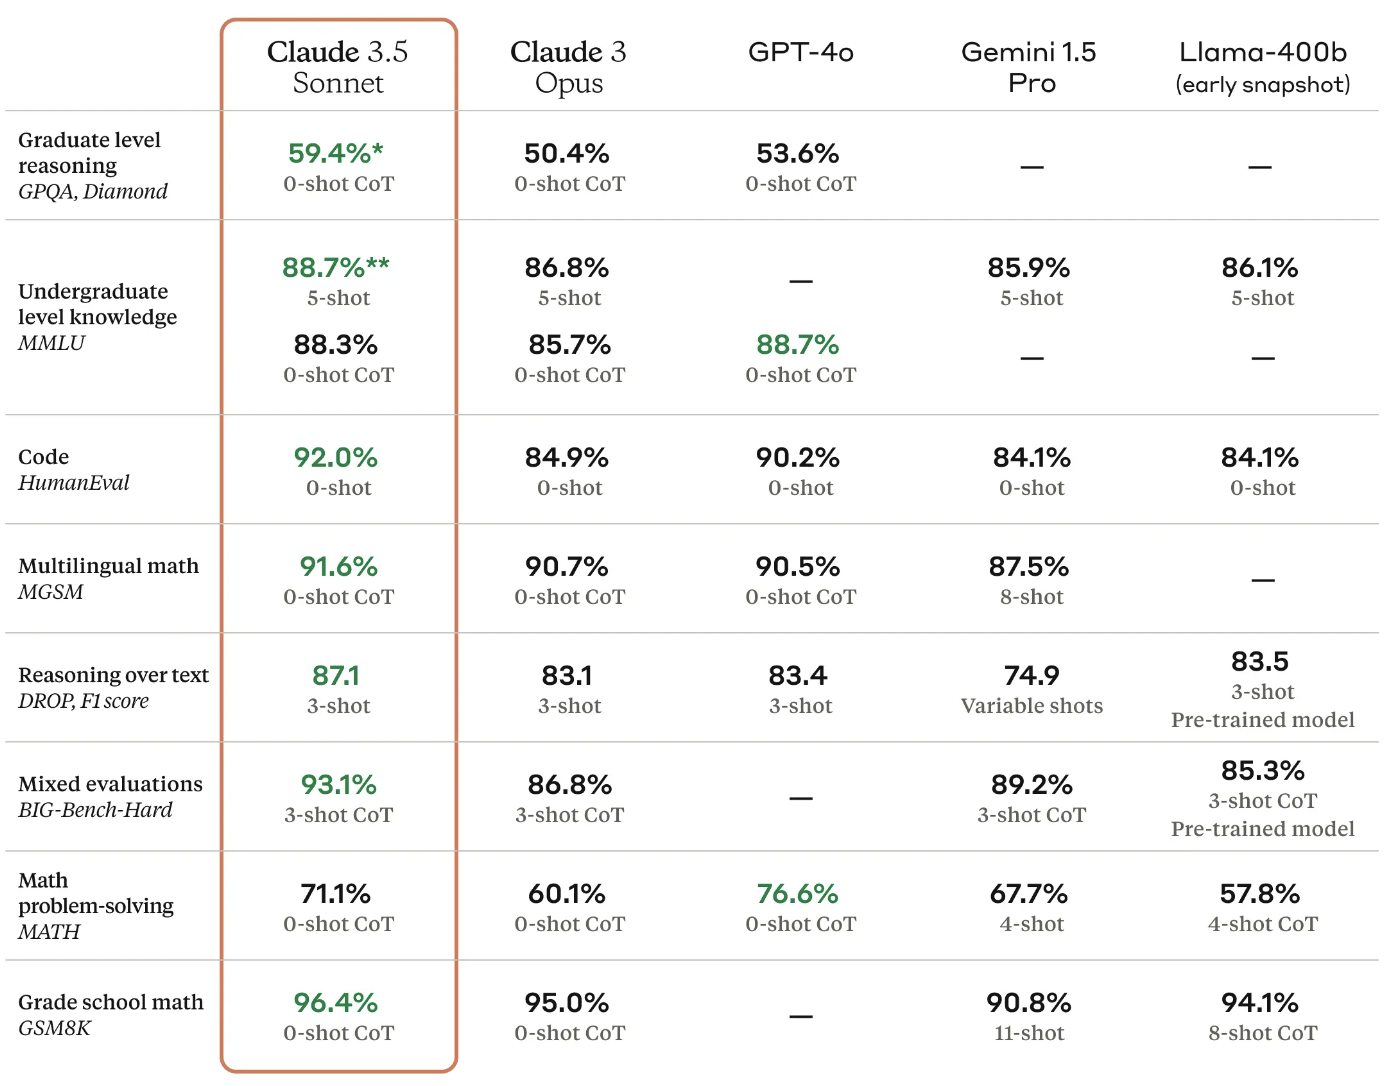



While these benchmarks are great for bragging rights and giving a general picture of a model's abilities, they're not the whole story. It's a bit like knowing someone's IQ score – it may (or may not!) tell you something about their general intelligence, but it doesn't tell you if they'd be good at your specific job.

---

---
### 中文翻译：
##基准
在我们深入研究客户评估之前，让我们花点时间讨论大多数人熟悉的一种评估形式：模型基准。

模型基准类似于AI世界的标准化测试。正如SAT分数应该使大学对学生的学术能力有一个一般的了解一样，模型的基准也使我们对AI模型在各种任务中的表现如何。

创建大型语言模型的公司运行这些基准，以展示其模型可以做什么。您可能会在测试中看到令人印象深刻的分数，其中包括ARC，MMLU或Elthfulqa等古怪的名字。这些基准涵盖了从基本阅读理解到各个领域的高级推理和知识的所有内容。它们对于比较不同的模型和跟踪AI功能的总体进展有用。您可能熟悉显示基准分数的型号卡：

！|| url_placeholder_0 ||



尽管这些基准非常适合吹牛权利，并给出了模型能力的一般图片，但它们并不是整个故事。这有点像知道某人的智商分数 - 它可能（或可能不会！）告诉您有关他们的一般智力的信息，但这并不能告诉您他们是否擅长您的特定工作。

---

## Customer evaluations

Imagine you've just bought a shiny new Swiss Army knife. It comes with dozens of tools and gadgets, but you're mainly interested in using it to open cans while camping. Sure, it's great that it can also file your nails or uncork wine bottles, but how well does it actually open cans? That's where prompt evaluations come in for large language models.

LLMs are like super-powered Swiss Army knives for text. They can do all sorts of amazing things with language, from writing poetry to coding software. But when you're using an LLM for a specific task – like answering customer service emails or generating product descriptions – you need to know how well it performs on that particular job.

This is where prompt evaluations, or "evals" for short, enter the picture. Prompt evaluations (also known as customer evaluations) are systematic tests designed to measure how well an LLM performs on your specific use case. They serve as a critical bridge between the generalized capabilities of LLMs and the unique demands of your business application. By implementing robust evals, you can ensure that the model and prompt combination not only meets general benchmarks but also excels in the particular tasks you need it to perform.

The main benefits of evaluations include:

* Iterative prompt improvement - is v2 of my prompt doing better than v1 at my specific task?
* Quality assurance before and after deployment and prompt changes - did our latest prompt update cause a regression?
* Objective model comparison - can we switch to Anthropic's newest model and maintain or better our current eval performance?
* Potential cost savings - can we switch to Anthropic's cheapest and fastest model and maintain our current eval performance?

When writing and optimizing prompts, we follow an iterative process that hinges around evaluations:

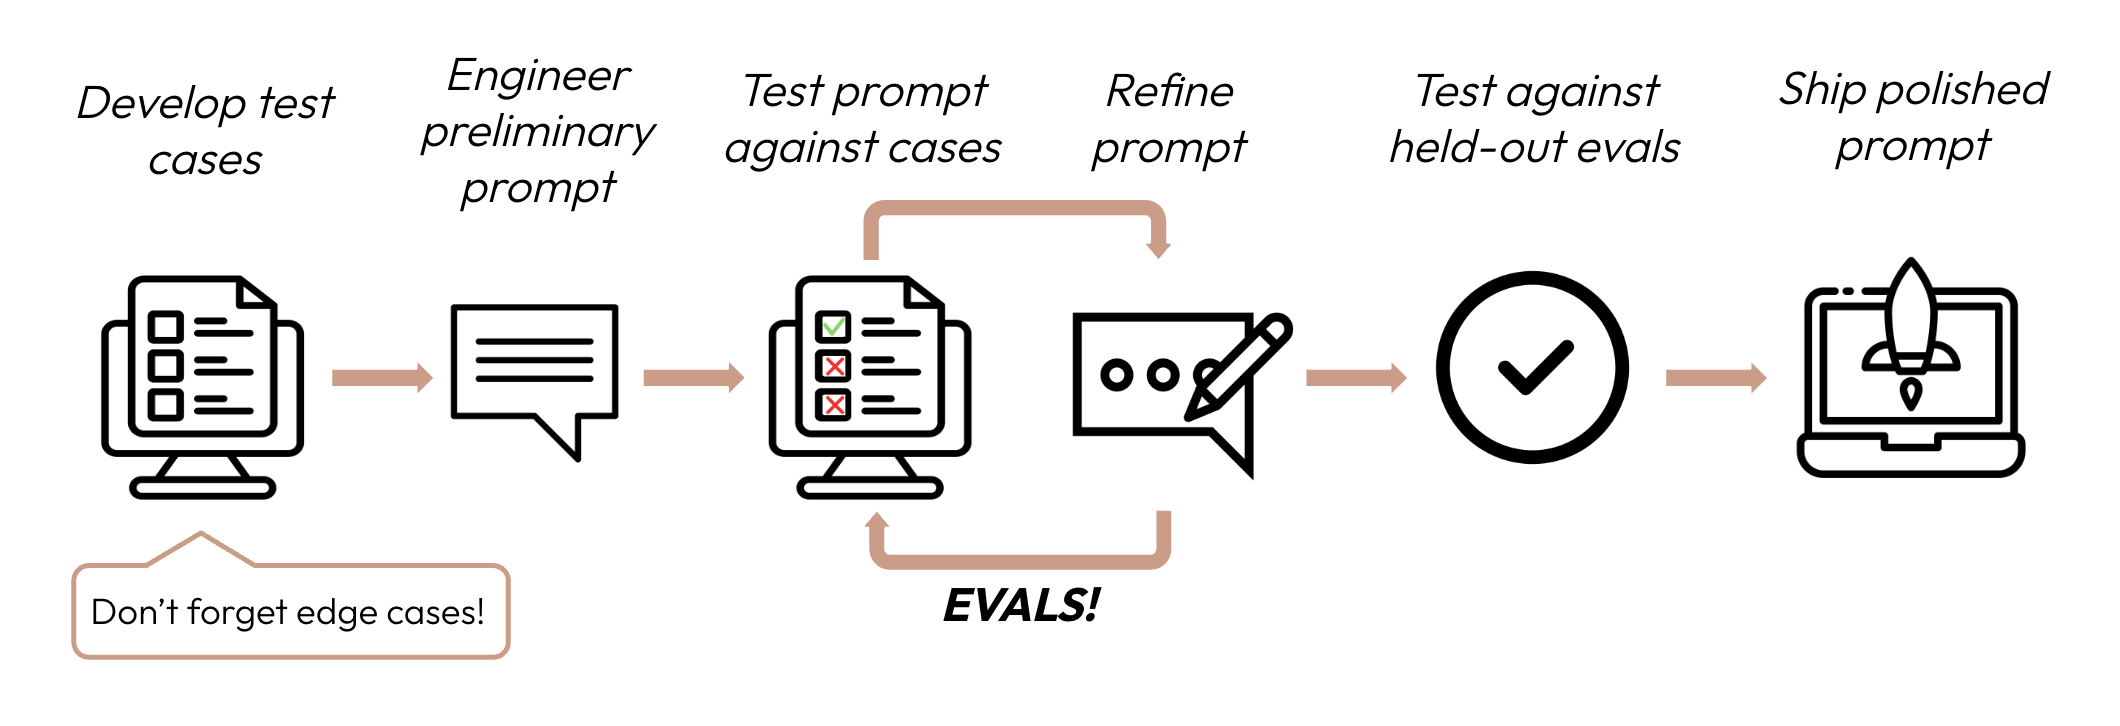



---
### 中文翻译：
##客户评估

想象一下，您刚刚买了一把闪亮的新瑞士军刀。它带有数十种工具和小工具，但是您主要有兴趣在露营时使用它来打开罐头。当然，它也可以提交指甲或Uncork Wine Bottles真是太好了，但是它实际上打开了罐子的能力呢？这就是大型语言模型及时评估的地方。

LLM就像是超级动力的瑞士军刀发短信。从写诗到编码软件，他们可以用语言做各种令人惊奇的事情。但是，当您将LLM用于特定任务时（例如接听客户服务电子邮件或生成产品描述）时，您需要知道它在该特定工作中的表现。

在这里，及时评估或简称“ Evals”，输入图片。及时评估（也称为客户评估）是系统的测试，旨在衡量LLM在特定用例上的性能。它们是LLM的广义功能与您的业务应用程序的独特需求之间的关键桥梁。通过实施强大的EVALS，您可以确保模型和及时组合不仅符合一般的基准测试，而且还可以在需要执行的特定任务中出色。

评估的主要好处包括：

*迭代及时改进 - 我提示的V2在我的特定任务中比V1做得更好吗？
*部署前后质量保证和迅速更改 - 我们最新的及时更新是否导致回归？
*客观模型比较 - 我们可以切换到Anthropic的最新模型并维护或更高我们当前的评估绩效吗？
*潜在的成本节省 - 我们可以切换到人类最便宜，最快的模型并保持我们当前的评估绩效吗？

在编写和优化提示时，我们遵循涉及评估的迭代过程：

！|| url_placeholder_0 ||

* We start by developing our test cases, which we'll learn more about in a moment.
* Then we write a rough draft of a prompt for our specific use-case.
* Next, we test our prompt with our set of test cases and measure how well the model did at our given task. We want some sort of baseline score.
* Once we have a baseline score, we can make changes to our prompt and repeat the process.

Evals are all about assigning metrics to quantify the quality of our prompt + model combination.  Without a quantitative measurement, how do we know if changes to a prompt are leading to improvements? 

---

---
### 中文翻译：
*我们首先要开发测试用例，我们将在稍后进一步了解。
*然后，我们为我们的特定用例写了一份提示的粗略草稿。
*接下来，我们使用一组测试用例测试提示，并衡量该模型在给定任务下的表现如何。我们想要某种基线得分。
*一旦获得基线得分，我们就可以对提示进行更改并重复该过程。

EVAL是为了分配指标来量化我们的及时 +模型组合的质量。没有定量测量，我们如何知道提示的变化是否会导致改进？

---

## What goes into an eval?

A well-designed prompt evaluation consists of four primary components:

* **Example Input:** This is the instruction or question given to the model. It's crucial to design prompts that accurately represent the kinds of inputs your application will encounter in real-world use.
* **Golden Answer:** The correct or ideal response serves as a benchmark for the model's output. Creating high-quality golden answers often requires input from subject matter experts to ensure accuracy and relevance.
* **Model Output:** This is the actual response generated by the LLM based on the input prompt. It's what you'll be evaluating against the golden answer.
* **Score:** A quantitative or qualitative value representing the model's performance on that particular input. The scoring method can vary depending on the nature of your task and the grading approach you choose.

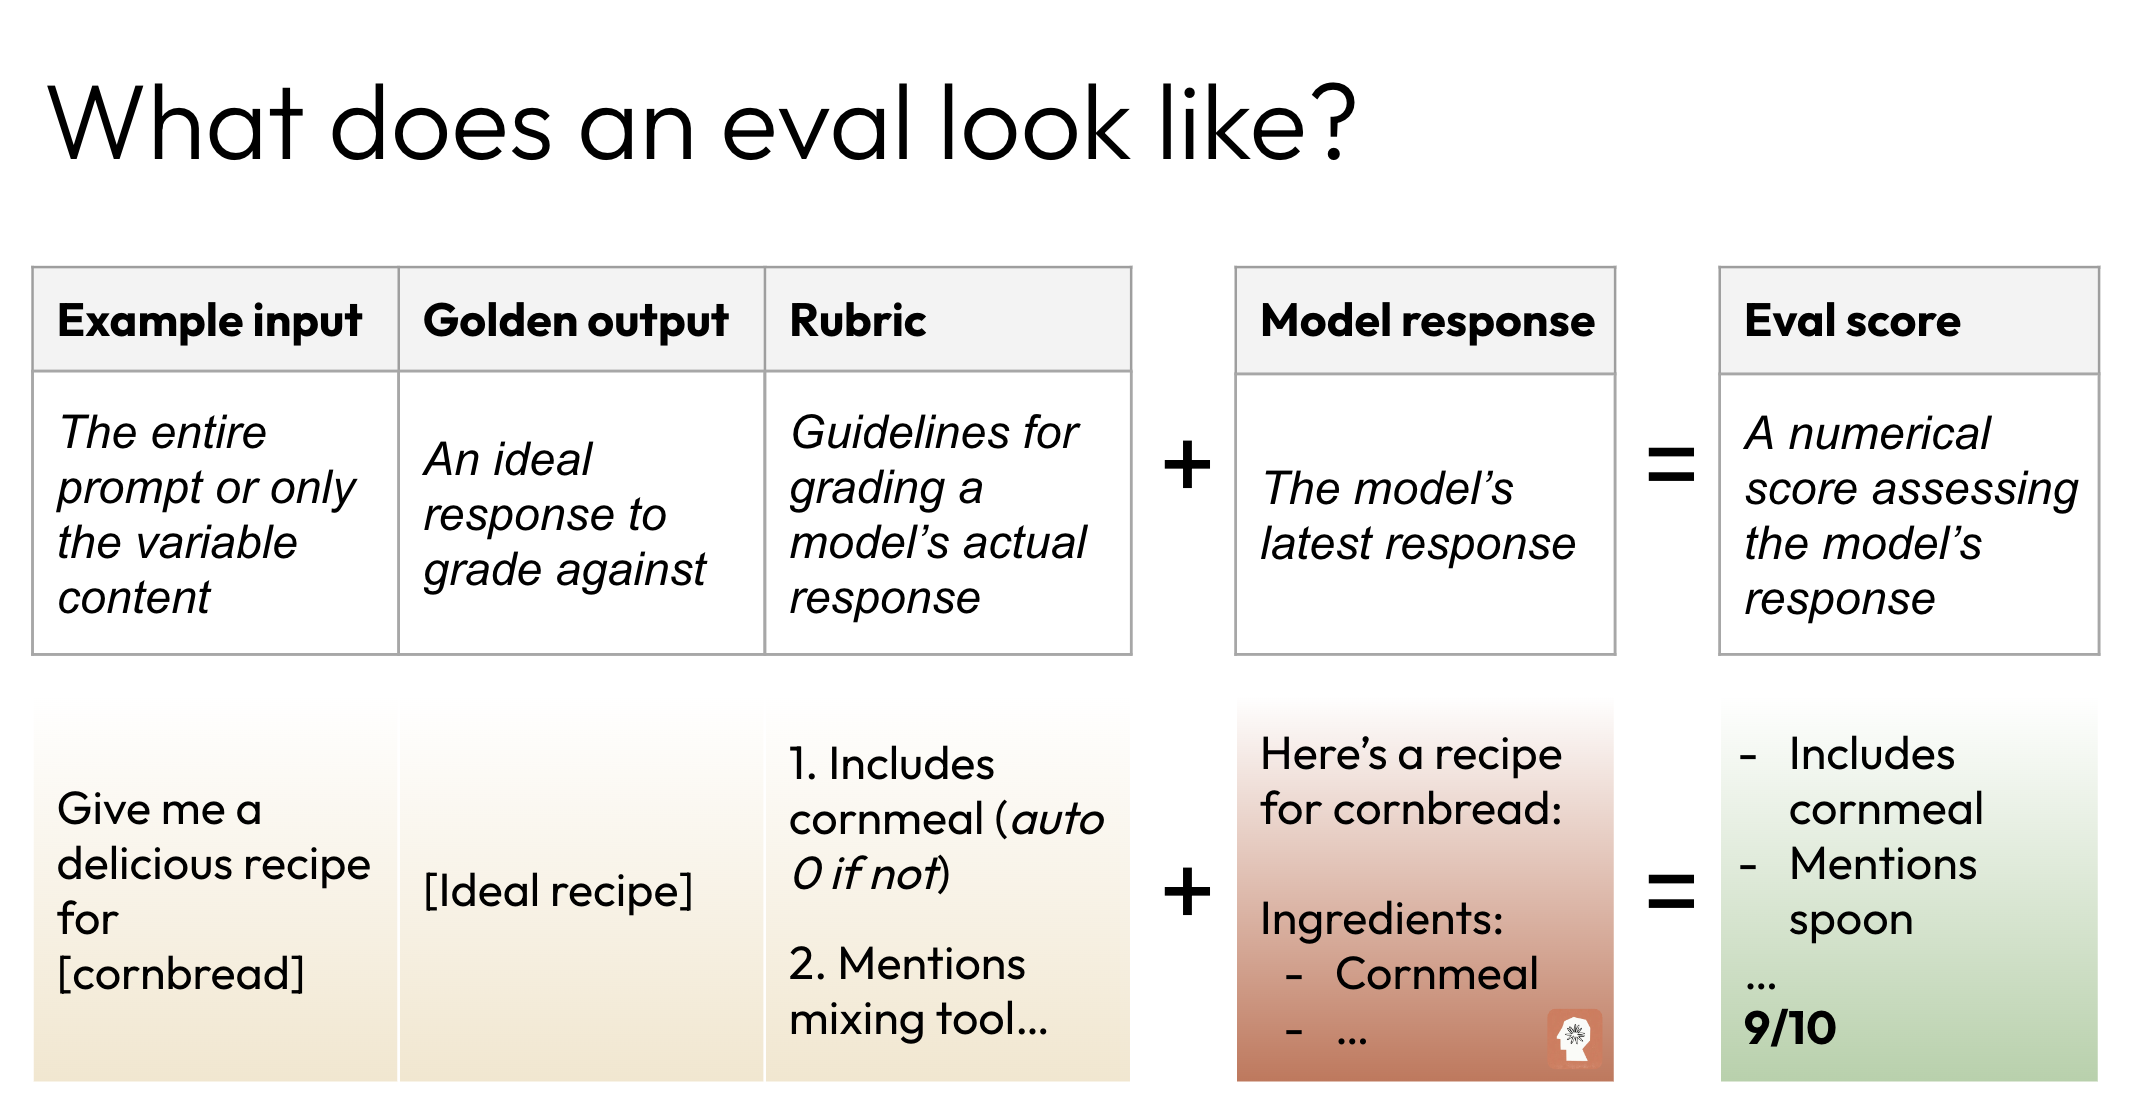

**We generally recommend at least 100 test-case/golden-answer pairs to get the best results, however to keep API costs down for learners following this course, most of our evals will use far fewer pairs.**

### Example eval data set

Imagine we want to use an LLM to classify complaints from customers.  A (very small) eval data set might look like this:

```py
eval_data = [
    {
        "complaint": "The app crashes every time I try to upload a photo",
        "golden_answer": ["Software Bug"]
    },
    {
        "complaint": "My printer isn't recognized by my computer",
        "golden_answer": ["Hardware Malfunction"]
    },
    {
        "complaint": "I can't figure out how to change my password",
        "golden_answer": ["User Error"]
    }
]
```
For each input complaint, we include a corresponding golden answer classification. We'll expand on this example in an upcoming lesson and learn how to run and grade the evaluation.

---

---
### 中文翻译：
##是什么进行评估？

精心设计的及时评估由四个主要组成部分组成：

***示例输入：**这是模型给出的指令或问题。设计提示准确地表示您的应用程序将在现实世界中遇到的输入的类型至关重要。
***黄金答案：**正确或理想的响应是模型输出的基准。创建高质量的黄金答案通常需要主题专家的意见，以确保准确性和相关性。
***模型输出：**这是LLM基于输入提示而生成的实际响应。这就是您对黄金答案的评估。
***分数：**代表模型在该特定输入上的性能的定量或定性值。评分方法可能会根据您的任务的性质和选择的分级方法而有所不同。

！|| url_placeholder_0 ||

**通常，我们通常建议至少100个测试案例/黄金答案对，以获得最佳结果，但是为了使学习者在本课程之后的学习者中降低API成本，我们的大多数Evals都会使用较少的对。** **

###示例评估数据集

想象一下，我们想使用LLM对客户的投诉进行分类。（非常小的）评估数据集可能看起来像这样：

|| code_block_placeholder_0 ||
对于每个输入投诉，我们包括相应的黄金答案分类。我们将在即将举行的课程中扩展此示例，并学习如何运行和评估评估。

---

## Grading approaches

Choosing the right grading method is critical to the effectiveness of our evaluations. Each method has its strengths and is suited to different types of tasks.

---
### 中文翻译：
##分级方法

选择正确的分级方法对于我们评估的有效性至关重要。每种方法都有其优势，并且适合不同类型的任务。

### Human-based grading

For tasks that require nuanced understanding or subjective judgment, human-based grading remains the gold standard. This method involves having individuals—often subject matter experts—review the model's outputs, assess their quality, and assign a score to each.

Human grading excels in evaluating aspects like tone, creativity, complex reasoning, or factuality in expert-level domains. It's particularly valuable when dealing with open-ended tasks or when the correctness of an answer depends on subtle contextual factors. The downside is that it's time-consuming and can be expensive, especially for large-scale evaluations. It's also subject to inconsistencies between different graders.

Forms of human-grading include:

* **Expert Review:** domain specialists assess responses for accuracy and depth. For a banking chatbot that discusses mortgage options, lawyers might manually review responses to ensure they comply with fair lending laws and accurately represent terms.  Dermatologists might evaluate a model’s skin cancer screening advice, checking for correct identification, appropriate urgency, and alignment with latest research.
* **User Experience Panel:** A group evaluates outputs for clarity, helpfulness, engagement, and other human-based judgements.

### Code-based grading

Code-based grading uses programmatic methods to evaluate the model's output. This approach is ideal for tasks with clear, objective criteria. For instance, if you're using an LLM to extract specific data points from text, you can use code to check if the extracted information matches the expected values.

The main advantage of code-based grading is its speed and scalability. Once set up, it can process thousands of evaluations quickly and consistently. However, it's limited in its ability to handle nuanced or subjective responses. Common code-based grading techniques include exact string matching, keyword presence checking, and pattern matching using regular expressions.

Forms of code-grading include:
* **Exact String Match Grading** - this is the strictest form, where the model's output must be identical to the golden answer, character by character. It's like a multiple-choice test where only one answer is correct. For a geography quiz, the question might be "What is the capital of France?" The only accepted answer would be "Paris" 
* **Keyword Presence**  - This method checks if the model's output contains certain critical words or phrases, regardless of their order or context.  In a product support chatbot, the query "How do I reset my SmartHome thermostat?" might require the keywords "hold", "button", "5 seconds", and "blinking light" to be included in the answer. 
* **Regular Expressions (Regex):** We can define regular expressions that can check for complex text patterns. A banking chatbot evaluating credit card eligibility might require the pattern "Your credit score of \d{3} (qualifies|does not qualify) you for our \w+ Card" to ensure it provides both the score and the outcome.
* Many others!

### LLM-based grading
LLM-based grading represents a middle ground between code-based and human-based approaches. This method uses another LLM (or sometimes the same one) to evaluate the outputs. By crafting careful grading prompts, you can leverage the LLM's language understanding capabilities to assess a wide range of criteria.

This approach can handle more complex and subjective evaluations than code-based grading while being faster and more scalable than human grading. However, it requires skillful prompt engineering to ensure reliable results, and there's always a risk of the grading LLM introducing its own biases.

Forms of model-grading include:
* **Summarization Quality** - How concise and accurate is this summary?
* **Tone Assessment**  - Does this response adhere to our brand guidelines or tone of voice?
* **Any other quality!** - We can define our own custom rubric that a large language model uses to grade outputs across any metrics we can imagine: how apologetic is the output? Does the output mention a competitor? 


---
### 中文翻译：
###基于人类的分级

对于需要细微的理解或主观判断的任务，基于人类的分级仍然是黄金标准。该方法涉及让个人（通常是主题专家）回顾模型的输出，评估其质量并为每个分数分配。

人类的评分在评估语调，创造力，复杂的推理或专家级领域的事实等方面方面表现出色。在处理开放式任务或答案的正确性取决于微妙的上下文因素时，它特别有价值。不利的一面是它很耗时，而且可能很昂贵，尤其是对于大规模评估。它也可能会遇到不同级别的不一致。

人类成绩的形式包括：

***专家评论：**域专家评估了对准确性和深度的回答。对于讨论抵押贷款选择的银行聊天机器人，律师可能会手动审查答复，以确保他们遵守公平的贷款法律并准确表示条款。皮肤科医生可能会评估模型的皮肤癌筛查建议，检查正确的识别，适当的紧迫性以及与最新研究的一致性。
***用户体验面板：**一个小组评估输出以清晰，有益，参与和其他基于人类的判断。

###基于代码的分级

基于代码的分级使用程序化方法来评估模型的输出。这种方法是具有明确，客观标准的任务的理想选择。例如，如果您使用LLM从文本中提取特定的数据点，则可以使用代码检查提取的信息是否与预期值匹配。

基于代码的分级的主要优点是其速度和可扩展性。设置后，它可以快速，一致地处理数千个评估。但是，它处理细微或主观反应的能力有限。常见的基于代码的分级技术包括使用正则表达式的精确字符串匹配，关键字匹配和模式匹配。

代码分级的形式包括：
***精确的字符串匹配等级**  - 这是最严格的形式，其中模型的输出必须与字符划分的金色答案相同。这就像一个多项选择测试，只有一个答案是正确的。对于地理测验，问题可能是“法国的首都是什么？”唯一接受的答案是“巴黎”
***关键字的存在**  - 此方法检查模型的输出是否包含某些关键词或短语，而不论其顺序或上下文如何。在产品支持聊天机器人中，查询“我如何重置我的Smarthome恒温器？”可能需要在答案中包含关键字“保持”，“按钮”，“ 5秒”和“闪烁的光”。
***正则表达式（REGEX）：**我们可以定义可以检查复杂文本模式的正则表达式。评估信用卡资格的银行聊天机器人可能需要“您的信用评分\ d {3}（符合条件|不合格）您为我们的\ w+卡符合条件”，以确保其提供分数和结果。
*许多其他！

###基于LLM的分级
基于LLM的分级代表基于代码和基于人类的方法之间的中间立场。此方法使用另一个LLM（或有时是相同的LLM）来评估输出。通过制定仔细的分级提示，您可以利用LLM的语言理解能力来评估广泛的标准。

与基于代码的分级相比，这种方法可以处理更复杂和主观的评估，同时比人类的评分更快，更可扩展。但是，它需要熟练的及时工程以确保可靠的结果，并且总是有级别LLM引入自己的偏见的风险。

模型分级的形式包括：
***摘要质量**  - 这个摘要是多么简洁和准确？
***音调评估**  - 此响应是否遵守我们的品牌准则或语调？
***任何其他质量！输出是否提到竞争对手？

--- 

## Conclusion 

Implementing robust prompt evaluations is a critical step in developing effective LLM applications. By systematically testing and refining your prompts, you can ensure your application delivers consistent, high-quality results that meet your specific needs. Remember, the time invested in creating good evals pays off in improved performance, easier optimization, and greater confidence in your LLM-powered solutions.

Next, let's learn how to write evals!

---
### 中文翻译：
---

＃＃ 结论

实施强大的及时评估是开发有效LLM应用程序的关键步骤。通过系统地测试和完善您的提示，您可以确保您的应用程序可提供一致的高质量结果，以满足您的特定需求。请记住，创建良好的Evals投入的时间在提高性能，更容易的优化和对LLM驱动解决方案的信心方面有所回报。

接下来，让我们学习如何编写Evals！